In [1]:
# Provided by Somayeh Komeylian: PhD Student at UCSD & SDSU #
# Deep Learning #

# Type of dataset: Image Dataset: Binary calssification
# path = kagglehub.dataset_download("anthonytherrien/dog-vs-cat") #
# I also forked the anthonytherrien/dog-vs-cat repository from KaggleHub to my own repository. #
# Methods (Not beginning from scratch): 
    # 1. Sequential model in Keras, which is a linear stack of three fully connected (Dense) layers suitable for a feedforward neural network.
    # 2. Convolutional Neural Network (CNN)
    # 3. Support Vector Machine (SVM)

# Customize the code with your own Kaggle account information:
# Set Kaggle API credentials as environment variables.
    # os.environ['KAGGLE_USERNAME'] = 'deardear123456'
    # os.environ['KAGGLE_KEY'] = '78e765f9a66ed233a108a1c33bed73d7'
# Modify all file paths to match your own setup   

In [13]:
############################### Step 1: Import all the required Libraries ##################################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier
import os
import cv2

In [ ]:
################ Step 2: Reading (or Loading) the dataset: #################
# Option 1: 

import kagglehub
path = kagglehub.dataset_download("anthonytherrien/dog-vs-cat")

C:\Users\komey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
################ Step 2: Reading (or Loading) the dataset: #################

print("Path to dataset files:", path)

Path to dataset files: C:\Users\komey\.cache\kagglehub\datasets\anthonytherrien\dog-vs-cat\versions\3


In [25]:
################ Step 2: Reading (or Loading) the dataset: #################
# Option 2: Use the Kaggle API in Python

import os
from kaggle.api.kaggle_api_extended import KaggleApi
import kagglehub

# Set Kaggle API credentials as environment variables.
os.environ['KAGGLE_USERNAME'] = 'deardear123456'
os.environ['KAGGLE_KEY'] = '78e765f9a66ed233a108a1c33bed73d7'

# Initialize and authenticate the Kaggle API
api = KaggleApi()
api.authenticate()

# Define the dataset identifier and download path
data_name = 'anthonytherrien/dog-vs-cat'
download_path = r'C:\Users\komey\OneDrive\Desktop\Summer_classes\Machine Learning\Session 5\animals22'

# Download the dataset files
# The 'unzip=True' parameter will automatically unzip the files into the download_path
api.dataset_download_files(data_name, path=download_path, unzip=True)

print(f"Dataset '{data_name}' downloaded to '{download_path}' and unzipped.")


Dataset URL: https://www.kaggle.com/datasets/anthonytherrien/dog-vs-cat
Dataset 'anthonytherrien/dog-vs-cat' downloaded to 'C:\Users\komey\OneDrive\Desktop\Summer_classes\Machine Learning\Session 5\animals22' and unzipped.


In [ ]:
################ Step 2: Reading (or Loading) the dataset: #################
# Option 2: Use the Kaggle API (API stands for *A*pplication *P*rogramming *I*nterface) in Python:

#### 1. Set credentials 
# Set credentials → tells your code which Kaggle account to use.
# This refers to the lines:
    # os.environ['KAGGLE_USERNAME'] = 'your_username' # adding or updating an environment variable in the current Python session.
    # os.environ['KAGGLE_KEY'] = 'your_api_key'
# Purpose: Python now knows which Kaggle account you’re using. These credentials allow your code to log in without asking for a username/password each time.

#### 2. Create API instance
# Create API instance → allows Python to communicate with Kaggle.
# This corresponds to:
# api = KaggleApi()
# Purpose: This creates a Python object that knows how to interact with Kaggle—download datasets, upload submissions, etc.

#### 3. Authenticate
# Authenticate → logs in and verifies your credentials so you can download datasets, submit files, etc.
# This is the line:
# api.authenticate()
# Purpose: The Kaggle API uses the credentials you set earlier to log in and verify your identity. After this step, you can safely run commands like:
# api.dataset_download_files('username/dataset-name', path='./')

#### Summary ####
# Think of it as a three-step login process:
# Tell Python your username and key → it knows which account to use.
# Create an API object → Python now has a “Kaggle client” to send commands.
# Authenticate → Confirm your credentials so you can access datasets or competitions.

In [23]:
# os.environ in Python
#### os.environ is a dictionary-like object in Python that contains all the environment variables of your operating system.
#### Environment variables are key-value pairs that store information about your system or user session (like PATH, USER, HOME, etc.).
#### You can read, set, or modify these variables from Python using os.environ.

In [19]:
################ Step 2: Reading (or Loading) the dataset: #################
# Option 3: 

path = r'C:\Users\komey\OneDrive\Desktop\Summer_classes\Machine Learning\Session 5\animals22\animals\cat'
for i in os.listdir(path):
    print(i)

00000-4122619873.png
00001-4122619874.png
00002-4122619875.png
00003-4122619876.png
00004-4122619877.png
00005-4122619878.png
00006-4122619879.png
00007-4122619880.png
00008-4122619881.png
00009-4122619882.png
00010-4122619883.png
00011-4122619884.png
00012-4122619885.png
00013-4122619886.png
00014-4122619887.png
00015-4122619888.png
00016-4122619889.png
00017-4122619890.png
00018-4122619891.png
00019-4122619892.png
00020-4122619893.png
00021-4122619894.png
00022-4122619895.png
00023-4122619896.png
00024-4122619897.png
00025-200124335.png
00026-200124336.png
00027-200124337.png
00028-200124338.png
00029-200124339.png
00030-200124340.png
00031-200124341.png
00032-200124342.png
00033-200124343.png
00034-200124344.png
00035-200124345.png
00036-200124346.png
00037-200124347.png
00038-200124348.png
00039-200124349.png
00040-200124350.png
00041-200124351.png
00042-200124352.png
00043-200124353.png
00044-200124354.png
00045-200124355.png
00046-200124356.png
00047-200124357.png
00048-200124358

In [ ]:
################ Step 2: Reading (or Loading) the dataset: #################
# Option 3: 

path = r'C:\Users\komey\OneDrive\Desktop\Summer_classes\Machine Learning\Session 5\animals22\animals\dog'
for i in os.listdir(path):
    print(i)

00500-3846168662.png
00501-3846168663.png
00502-3846168664.png
00503-3846168665.png
00504-3846168666.png
00505-3846168667.png
00506-3846168668.png
00507-3846168669.png
00508-3846168670.png
00509-3846168671.png
00510-3846168672.png
00511-3846168673.png
00512-3846168674.png
00513-3846168675.png
00514-3846168676.png
00515-3846168677.png
00516-3846168678.png
00517-3846168679.png
00518-3846168680.png
00519-3846168681.png
00520-3846168682.png
00521-3846168683.png
00522-3846168684.png
00523-3846168685.png
00524-3846168686.png
00525-3846168687.png
00526-3846168688.png
00527-3846168689.png
00528-3846168690.png
00529-3846168691.png
00530-3846168692.png
00531-3846168693.png
00532-3846168694.png
00533-3846168695.png
00534-3846168696.png
00535-3846168697.png
00536-3846168698.png
00537-3846168699.png
00538-3846168700.png
00539-3846168701.png
00540-3846168702.png
00541-3846168703.png
00542-3846168704.png
00543-3846168705.png
00544-3846168706.png
00545-3846168707.png
00546-3846168708.png
00547-3846168

In [52]:
#### OS-Module Functions
# 1. Handling the Current Working Directory
# 2. Creating a Directory
# 3. Listing out Files and Directories with Python
# 4. Deleting Directory or Files using Python
# 5. File Permissions and Metadata
# https://www.geeksforgeeks.org/python/os-module-python-examples/ #

In [89]:
################ Step 3: Image Preprocessing in the given dataset: #################

image_path = r'C:\Users\komey\OneDrive\Desktop\Summer_classes\Machine Learning\Session 5\animals22\animals\cat'

# Image Preprocessing:
x = []
y = []

for i in os.listdir(image_path):
    b = os.path.join(image_path, i)
    img = cv2.imread(b,0)
    blur = cv2.blur(img, (5, 5))
    img2 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 19, 8)
    img2 = cv2.resize(img2, (128, 128))
    x.append(img2)
    y.append(0)

image_path_2 = r'C:\Users\komey\OneDrive\Desktop\Summer_classes\Machine Learning\Session 5\animals22\animals\dog'
for i in os.listdir(image_path_2):
    b = os.path.join(image_path_2, i)
    img = cv2.imread(b,0)
    blur = cv2.blur(img, (5, 5))
    img2 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 19, 8)
    img2 = cv2.resize(img2, (128, 128))
    x.append(img2)
    y.append(1)

In [75]:
# img = cv2.imread(b,0)
# The second parameter 0 specifies the color mode for reading the image:
    # 0 means grayscale mode, where the image is read as a grayscale (single channel) image.
    # If you wanted to read the image in color (BGR format), you could use 1 instead of 0.
    # -1 is used to load the image in its original color (including transparency if applicable).

# The cv2.blur() function applies a convolution operation with a kernel (or filter) that computes the average of all the pixels in a square window around each pixel.
# (5, 5): This tuple represents the size of the kernel used for the blur. 
# The kernel size of (5, 5) means that for each pixel in the image, the filter will look at a 5x5 neighborhood of pixels (total of 25 pixels) 
# around the pixel and calculate the average value of these pixels. 
# The pixel in the center of this neighborhood is replaced with this average value.

# cv2.ADAPTIVE_THRESH_MEAN_C computes a local threshold using the mean of pixel values in a neighborhood.
# cv2.THRESH_BINARY_INV inverts the binary output.

# What is Thresholding???
# Thresholding is a technique used to convert a grayscale image into a binary image, where all pixel values are either black (0) or white (255). 
# The pixel values in the output image depend on a specified threshold value:

# Binary Thresholding:  
    # Pixels greater than the threshold become white (255), and pixels less than the threshold become black (0).

# Inverted Binary Thresholding (THRESH_BINARY_INV): 
    # Pixels greater than the threshold become black (0), and pixels less than the threshold become white (255).
    # If x > threshold: Set pixel value to 0 (black)
    # If x <= threshold: Set pixel value to 255 (white)

# It is useful for highlighting dark features or when you need inverted masks for further processing.
#  این معکوس‌ سازی معمولاً زمانی مفید است که بخواهید ویژگی‌های تاریک یا اشیاء روی زمینه روشن را شناسایی کنید.

In [33]:
################ Step 3: Image Preprocessing in the given dataset: #################
# Explanation of the previous cell: #

#### **What Does the Code Do?**
# The code performs the following key steps:
#### 1. **Image Preprocessing**:
    #  * Converts images to **grayscale**.
    #  * Applies **blurring** to smooth the image.
    #  * Applies **adaptive thresholding** to create binary images (black and white).
    #  * Resizes **images to a consistent size of 128x128 pixels.

#### 1.1. Converts images to grayscale
# Reason: Most computer vision tasks don’t need color information; they focus on intensity patterns (light and dark areas).
# Benefits:
# Reduces computational complexity (3 color channels → 1 channel).
# Makes algorithms like edge detection, thresholding, and contour detection more effective.
# Example: Detecting shapes or text in an image usually only requires grayscale.

#### 1.2. Applies blurring (smoothing)
# Reason: Reduces noise in the image, which can interfere with feature extraction.
# Benefits:
# Smooths out small variations in pixel values.
# Improves the effectiveness of subsequent processing steps like thresholding or edge detection.
# Common Techniques: Gaussian blur, median blur.

#### 1.3. Applies adaptive thresholding
# Reason: Converts a grayscale image into a binary image (black and white) where foreground objects are clearly separated from the background.
# Benefits:
# Handles varying lighting conditions better than simple thresholding.
# Simplifies image data, making it easier for algorithms to detect shapes or patterns.
# Example: In document scanning, text becomes black and the background white, making OCR easier.

#### 1.4. Resizes images to a consistent size (128x128 pixels)
# Reason: Machine learning models require inputs of the same dimensions.
# Benefits:
# Standardizes input for neural networks or other algorithms.
# Reduces memory usage and computation time.
# Helps models converge faster during training because input shape is uniform.

#### Summary: ####
# Preprocessing transforms raw images into a clean, uniform, and computationally manageable format. Each step — grayscale conversion, blurring, thresholding, resizing 
# — makes it easier for computer vision models or algorithms to extract meaningful features while reducing noise and complexity.


#### 2. **Dataset Creation**:
    # * Collects the processed images (`x`) and their corresponding labels (`y`), where:
    # * `0` represents **cat images**.
    # * `1` represents **dog images**.
# This setup could be used for training a **binary classifier** (e.g., CNN) to distinguish between cats and dogs, 
# where `x` represents the input features (images) and `y` represents the target labels.

In [ ]:
# os stands for operating system and is a module that helps interact with the filesystem and environment.
# The os module in Python is a built-in module that provides a way to interact with the operating system. 
# It includes functions to work with files, directories, paths, and other operating system-level operations.

In [90]:
################# Step 4: Inspect Data Type: #################

print("Targets:", y)
print("Number of images:", len(x))
print("Number of labels:", len(y))

Targets: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [91]:
################# Step 4: Inspect Data Type: #################
import numpy as np

unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(500), np.int64(1): np.int64(500)}


In [92]:
################# Step 4: Inspect Data Type: #################

x = np.array(x)
y = np.array(y)

In [93]:
################# Step 4: Inspect Data Type: #################

import numpy as np

unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(500), np.int64(1): np.int64(500)}


In [94]:
################# Step 4: Inspect Data Type: #################

x

array([[[  0, 255, 255, ...,   0,   0,   0],
        [  0, 255, 255, ...,   0,   0,   0],
        [  0, 255, 255, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 128,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [255,   0,   0, ...,   0,   0,   0],
        [  0,  64,   0, ...,   0,   0,   0],
        [  0, 255,   0, ..., 255,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [95]:
################# Step 4: Inspect Data Type: #################
import os

download_path = r'C:\Users\komey\OneDrive\Desktop\Summer_classes\Machine Learning\Session 5\animals22'

# List the contents of the downloaded directory
print(f"Contents of '{download_path}':")
for item in os.listdir(download_path):
    print(item)

Contents of 'C:\Users\komey\OneDrive\Desktop\Summer_classes\Machine Learning\Session 5\animals22':
animals


In [96]:
################# Step 4: Inspect Data Type: #################

x

array([[[  0, 255, 255, ...,   0,   0,   0],
        [  0, 255, 255, ...,   0,   0,   0],
        [  0, 255, 255, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 128,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [255,   0,   0, ...,   0,   0,   0],
        [  0,  64,   0, ...,   0,   0,   0],
        [  0, 255,   0, ..., 255,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [97]:
################# Step 4: Inspect Data Type: #################

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [98]:
################# Step 5: Split the data into training and testing sets: #################

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(f"x_train.shape is {x_train.shape} \ny_train.shape is {y_train.shape} \nx_test.shape is {x_test.shape} \ny_test.shape is {y_test.shape}")

x_train.shape is (800, 128, 128) 
y_train.shape is (800,) 
x_test.shape is (200, 128, 128) 
y_test.shape is (200,)


In [99]:
################# Step 6: Define the Dense Model Architecture: #################
# Model 1: Dense Model:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

# Assuming your input data has a shape that can be interpreted as an "image" (e.g., a 6x5 image with 1 channel)
# If your data is just a 1D vector of 30, Conv1D might be more appropriate.

model = Sequential()
# The input layer must be the first layer and define the input_shape (excluding batch dimension)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(6, 5, 1))) # Example input shape
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))

model.add(Flatten()) 
# Flattens the 3D output of Conv2D to a 1D vector.
# This layer converts the 3D feature map output from the last convolutional layer (which has a shape of 2x1x16) into a 1D vector of length 32. 
# This is necessary to feed the data into the subsequent fully connected Dense layers.

model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax')) # Output layer for 2 classes

model.summary()


C:\Users\komey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 4, 3, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 2, 1, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,186 (28.07 KB)

 Trainable params: 7,186 (28.07 KB)

 Non-trainable params: 0 (0.00 B)

Text(0.5, 1.0, 'Convolutional Neural Networks')

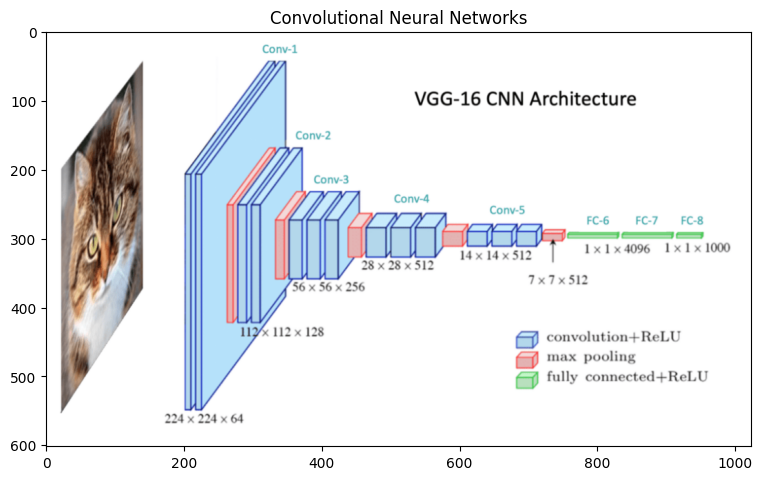

In [100]:
################# Step 6: Define the Convolutional Neural Network(CNN) Model Architecture: #################
# Model 2: CNN Model:

# Contextual Explanation for Convolutional Neural Networks #
# https://www.youtube.com/watch?v=yb2tPt0QVPY&t=3s #
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('b3.png')
plt.figure(figsize=[20,25])
plt.subplot(121); plt.imshow(img[...,::-1]); plt.title('Convolutional Neural Networks')

In [101]:
################# Step 6: Define the Convolutional Neural Network(CNN) Model Architecture: #################
# Model 2: CNN Model:

# Contextual Explanation for Convolutional Neural Networks #
# https://www.youtube.com/watch?v=yb2tPt0QVPY&t=3s #

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('b4.png')
plt.figure(figsize=[20,15])
plt.subplot(121); plt.imshow(img[...,::-1]); plt.title('Why the activation function of Relu?')

#  ReLU removes negative values in the feature maps produced by the neural network, NOT in the original image.
# Here’s what actually happens:
#### Step 1 — Input image (0–255)
# All pixel values are non-negative, so no negative numbers exist.

#### Step 2 — Convolution layer
# Filters + biases create new values, which can be negative:
# Example:
        # [120, 90]  *  kernel  -> output = -3.2
        # [100, 40]
# Now the network has negative activations, even though the original image did not.

#### Step 3 — ReLU
# ReLU removes these new negative values, not the original image pixels:
        # ReLU(x) = max(0,x)
# So:
# -3.2 → 0
#  5.6  → 5.6


Text(0.5, 1.0, 'Why the activation function of Relu?')

Text(0.5, 1.0, 'Explanation 2')

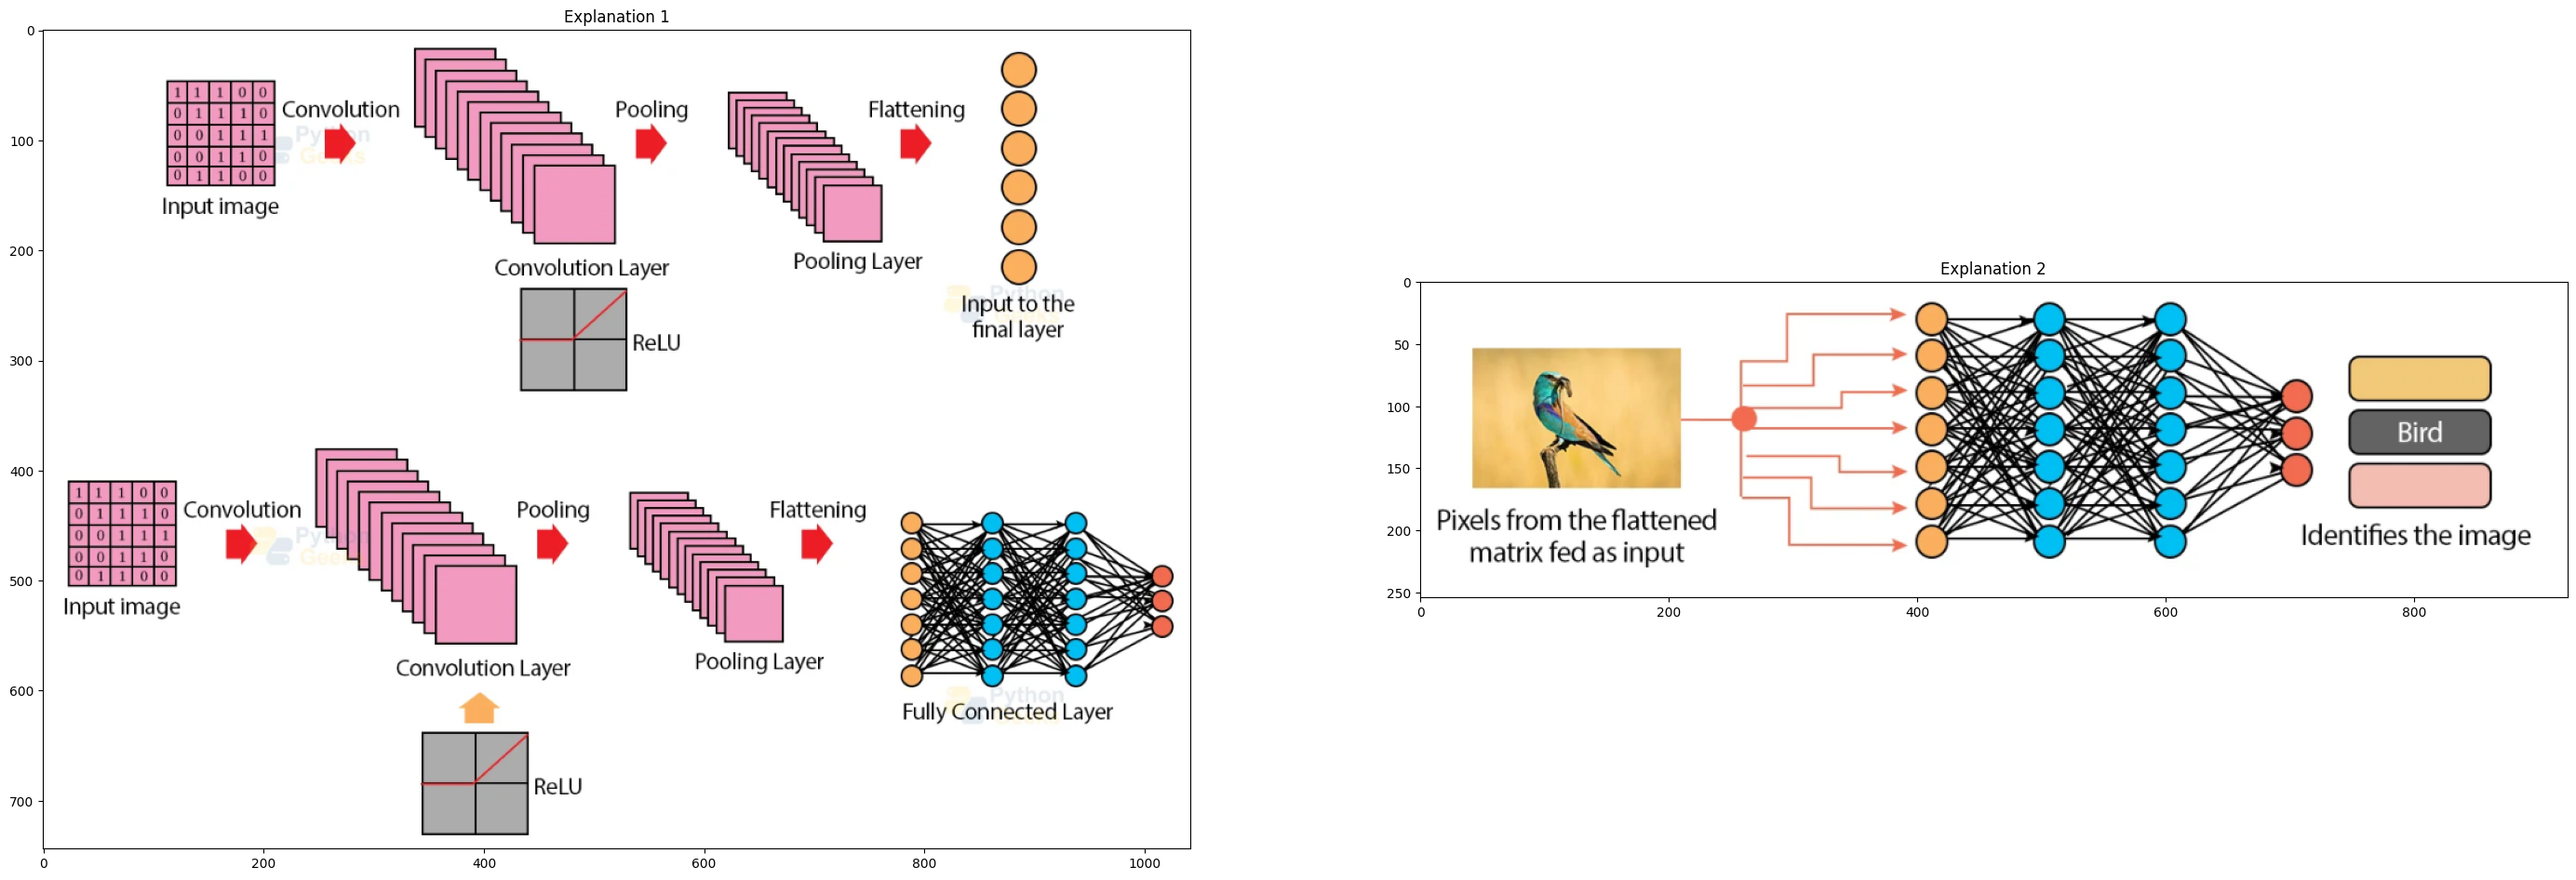

In [102]:
################# Step 6: Define the Convolutional Neural Network(CNN) Model Architecture: #################
# Model 2: CNN Model:

# https://pythongeeks.org/convolutional-neural-network/ #
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('b5.png')
img1 = cv2.imread('b6.png')
plt.figure(figsize=[35,25])
plt.subplot(121); plt.imshow(img[...,::-1]); plt.title('Explanation 1')
plt.subplot(122); plt.imshow(img1[...,::-1]); plt.title('Explanation 2')

In [103]:
################# Step 6: Define the Convolutional Neural Network(CNN) Model Architecture: #################
# Model 2: CNN Model:

# In image processing, flattening is a key step in image detection, but it substantially increases the volume of the data, particularly for color images. 
# As a result, feeding this high-volume data directly into dense layers becomes computationally prohibitive. 
# Convolutional Neural Networks (CNNs) can be leveraged to efficiently extract informative features from images.

# A Convolutional Neural Network (CNN) is a type of deep learning model primarily used for processing structured grid data like images. 
# Its architecture is designed to automatically and adaptively learn spatial hierarchies of features. Here are the main components of a CNN:
#### 1. Input Layer:
# This is where the raw data (e.g., an image) enters the network.
# Typically represented as a 3D matrix: height × width × channels
# Example: a color image of 128×128 pixels → 128×128×3 (RGB channels)

#### 2. Convolutional Layer:
# The core building block of a CNN.
# Uses filters/kernels to scan across the input and extract local features like edges, textures, or patterns.
# Output: feature maps (also called activation maps)
# Key concepts:
    # Filter/Kernel size: e.g., 3×3, 5×5
    # Stride: step size of the filter as it moves across the input
    # Padding: adding extra pixels to preserve spatial dimensions

#### 3. Activation Function
# Usually applied after convolution to introduce non-linearity, enabling the network to learn complex patterns.
# Common activations:
    # ReLU (Rectified Linear Unit): f(x) = max(0, x) – most widely used
    # Leaky ReLU, Sigmoid, Tanh – less common in modern CNNs

#### 4. Pooling (Subsampling) Layer
# Reduces the spatial dimensions of feature maps to:
    # Lower computational cost
    # Reduce overfitting
# Common types:
    # Max Pooling: takes the maximum value in a region
    # Average Pooling: takes the average value
    # Example: 2×2 max pooling reduces a 128×128 feature map to 64×64

# Up to here: kernels → feature maps → flatten → dense layer #

#### 5. Fully Connected (Dense) Layer
# After several convolutional + pooling layers, the high-level features are flattened into a vector.
# Dense layers combine these features to make the final classification or regression.
# Each neuron is connected to all neurons in the previous layer.

#### 6. Output Layer
# Produces the network’s final prediction.
# Depends on the task:
    # Classification: softmax activation for probabilities
    # Regression: linear activation

#### 7. Optional Layers / Components
# Dropout: randomly disables neurons during training to prevent overfitting
# Batch Normalization: normalizes activations to speed up training and improve stability
# Residual Connections / Skip Connections: used in deep architectures (like ResNet) to avoid vanishing gradients

######## Summary of Typical CNN Flow: ########
######## Input → [Conv → Activation → Pool] × N → Flatten → Fully Connected → Output

Text(0.5, 1.0, 'Explanation 1')

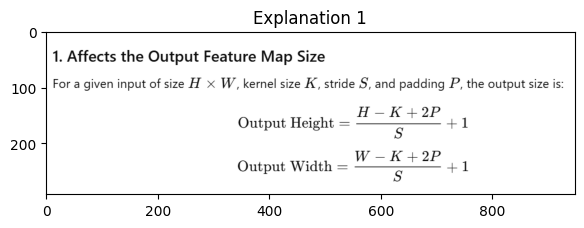

In [104]:
################# Step 6: Define the Convolutional Neural Network(CNN) Model Architecture: #################
# Model 2: CNN Model:

# How Kernel Size Affects the Output in CNNs #
# A kernel (filter) slides over the input image to produce a feature map. 
# Its size changes (1) what the network detects and (2) also affects the spatial dimensions of the output. 
 
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('b8.png')
plt.figure(figsize=[15,15])
plt.subplot(121); plt.imshow(img[...,::-1]); plt.title('Explanation 1')

# Larger stride → smaller output
# Smaller stride → larger output
# So stride directly affects H and W, which then affects the number of nodes in the dense layer

# Each kernel produces one feature map.
# If you have 64 kernels → you get 64 feature maps.
# After several convolution + pooling operations, the final feature maps have size:

    # H(out) × W(out) × 𝐶 

# where:
    # H(out) = height of final feature maps = the output height shown in the image attached to this cell
    # W(out) = width of final feature maps = the output width shown in the image attached to this cell
    # C(out) = number of kernels (channels)

# Before the dense layer, this 3D tensor is flattened into:
    
    # H(out) × W(out) × 𝐶  nodes

# Therefore:
# Number of nodes in dense input = 
    # = H(out) (the output height shown in the image attached to this cell) × W(out) (the output width shown in the image attached to this cell) × 𝐶 (number of kernels)
# So the kernels affect the dense layer size through the flattened output, but they are not the number of dense layer nodes by themselves.
# Although kernels do not directly represent neurons, the number of kernels defines the depth of the final feature maps, 
# and when these maps are flattened, they determine the number of input units for the dense layer.


In [105]:
################# Step 6: Define the Convolutional Neural Network(CNN) Model Architecture: #################
# Model 2: CNN Model:

#### Why Pooling is Used in Neural Networks? ####
#### 1. Reduces Spatial Dimensions (Downsampling)
# Pooling reduces the height and width of feature maps while keeping the depth (number of channels) the same.
# This helps to:
# Reduce computational cost (fewer neurons to process)
# Reduce memory usage
# Example:
    # A 32×32×64 feature map with 2×2 pooling → 16×16×64

#### 2. Extracts Dominant Features (Feature Consolidation)
# Pooling emphasizes the most important features in a region.
    # Max pooling: keeps the largest activation (strongest feature)
    # Average pooling: keeps the average activation (general feature)
# This makes the network more robust to small changes, noise, or distortions in the input.

#### 3. Provides Translation Invariance
# Pooling makes the network less sensitive to small shifts or translations in the input image.
# Example: If an object moves slightly, max pooling ensures its most prominent features are still captured.

#### 4. Prevents Overfitting
# By reducing the spatial size and number of parameters, pooling helps simplify the model, which can reduce overfitting on small datasets.

In [106]:
################# Step 6: Define the Convolutional Neural Network(CNN) Model Architecture: #################
# Model 2: CNN Model:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D # Corrected import

# Assuming your input data has a shape that can be interpreted as an "image" (e.g., a 6x5 image with 1 channel)
# If your data is just a 1D vector of 30, Conv1D might be more appropriate.

model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape = (128, 128, 1), activation='relu'))
model.add(MaxPooling2D((3,3))) # Used MaxPooling2D instead of MaxPool2D

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((3,3))) # Used MaxPooling2D instead of MaxPool2D

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((3,3))) # Used MaxPooling2D instead of MaxPool2D

model.add(Flatten()) 
# Flattens the 3D output of Conv2D to a 1D vector.
# This layer converts the 3D feature map output from the last convolutional layer (which has a shape of 2x1x16) into a 1D vector of length 32. 
# This is necessary to feed the data into the subsequent fully connected Dense layers.

model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax')) # Output layer for 2 classes

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 126, 126, 128)  │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 42, 42, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 40, 40, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 11, 11, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,194 (383.57 KB)

 Trainable params: 98,194 (383.57 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
################# Step 7: Compile and Fit the model: #################

model.compile(optimizer = 'adam', loss = 'spare_categorial_crossentropy', metrics = ['accuracy'])

In [111]:
################# Step 9: Make predictions for the CNN Model: #################

y_pred = model.predict(x_test)
print("Predictions:", y_pred[:20])
print("Actual:", y_test[:20])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predictions: [[1.2671349e-13 1.0000000e+00]
 [4.4857727e-17 1.0000000e+00]
 [1.3780184e-11 1.0000000e+00]
 [5.0120379e-16 1.0000000e+00]
 [1.2850197e-08 1.0000000e+00]
 [1.4131457e-10 1.0000000e+00]
 [1.1296527e-15 1.0000000e+00]
 [2.3833971e-05 9.9997616e-01]
 [5.6415671e-11 1.0000000e+00]
 [4.3133072e-10 1.0000000e+00]
 [4.8561584e-12 1.0000000e+00]
 [1.9301254e-08 1.0000000e+00]
 [3.8925702e-07 9.9999964e-01]
 [4.7230273e-08 1.0000000e+00]
 [9.2154430e-11 1.0000000e+00]
 [9.1513873e-11 1.0000000e+00]
 [5.5914577e-17 1.0000000e+00]
 [4.7184142e-13 1.0000000e+00]
 [4.6910547e-09 1.0000000e+00]
 [2.2614945e-13 1.0000000e+00]]
Actual: [1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0]


In [109]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('b1.png')
img = cv2.imread('b2.png')

plt.figure(figsize=[35,35])
plt.subplot(121); plt.imshow(img[...,::-1]); plt.title('Explanation 1')
plt.subplot(122); plt.imshow(img[...,::-1]); plt.title('Explanation 2')

Text(0.5, 1.0, 'Explanation 2')

{np.int64(0): np.int64(500), np.int64(1): np.int64(500)}


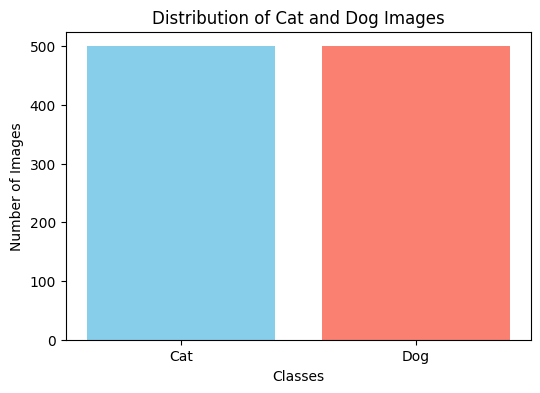

In [112]:
################# Step 8: Evaluate the CNN model performance: #################

import numpy as np
import matplotlib.pyplot as plt

unique, counts = np.unique(y, return_counts=True)

# Print dictionary
print(dict(zip(unique, counts)))

# --- Visualization ---
plt.figure(figsize=(6, 4))
plt.bar(unique, counts, color=['skyblue', 'salmon'])
plt.xticks(unique, ['Cat', 'Dog'])
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Distribution of Cat and Dog Images")
plt.show()


C:\Users\komey\AppData\Local\Temp\ipykernel_13604\1330984056.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_vis, x='class', y='count', palette=['skyblue', 'salmon'])


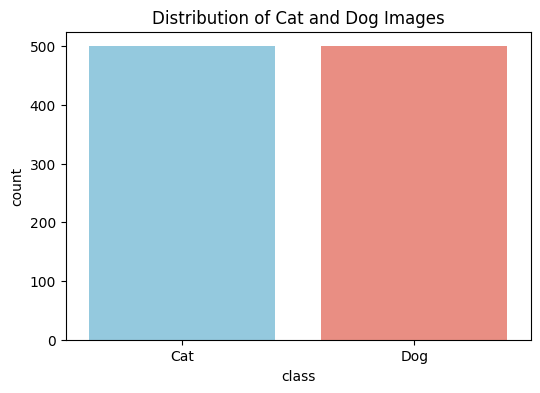

In [113]:
################## Step 8: Evaluate the CNN model performance: #################
#  Seaborn Version (Prettier)

import seaborn as sns
import pandas as pd

df_vis = pd.DataFrame({'class': ['Cat', 'Dog'], 'count': counts})

plt.figure(figsize=(6,4))
sns.barplot(data=df_vis, x='class', y='count', palette=['skyblue', 'salmon'])
plt.title("Distribution of Cat and Dog Images")
plt.show()


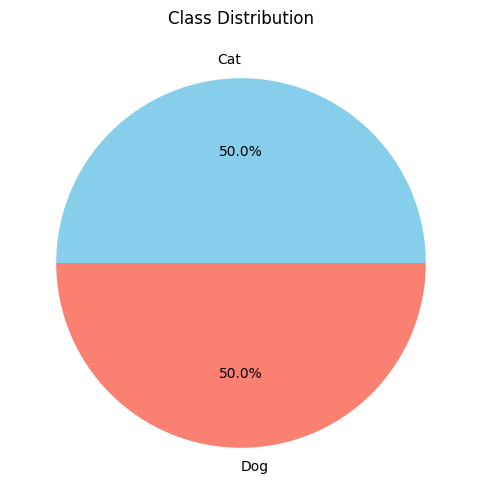

In [114]:
################# Step 8: Evaluate the CNN model performance: #################
# Pie Chart Version

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=['Cat', 'Dog'], autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title("Class Distribution")
plt.show()


In [116]:
################# Step 6: Define the Support Vector Machine Model Architecture: #################
# Model 3: Support Vector Machine(SVM) Model:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Convert to numpy
X = np.array(x).reshape(len(x), -1)  # flatten images
Y = np.array(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a simple SVM classifier
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


In [ ]:
################# Step 9: Make predictions for the SVM Model: #################

y_pred = model.predict(X_test)
print("Predictions:", y_pred[:20])
print("Actual:", y_test[:20])

Predictions: [1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0]
Actual: [1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0]


In [121]:
################# Step 8: Evaluate the SVM model performance: #################
# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.69

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        96
           1       0.71      0.67      0.69       104

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200


Confusion Matrix:
[[68 28]
 [34 70]]


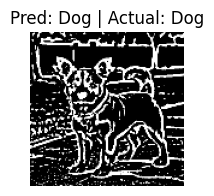

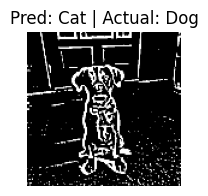

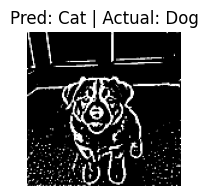

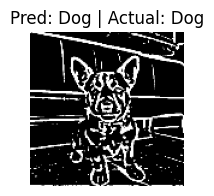

In [124]:
################# Step 8: Evaluate the SVM model performance: #################
# Visualize Test Predictions

import matplotlib.pyplot as plt

for idx in range(6):
    plt.figure(figsize=(2, 2))
    plt.imshow(X_test[idx].reshape(128, 128), cmap='gray')
    plt.title(f"Pred: {'Cat' if y_pred[idx]==0 else 'Dog'} | Actual: {'Cat' if y_test[idx]==0 else 'Dog'}")
    plt.axis('off')
    plt.show()
